In [1]:
#Importing Libraries 
#basics and Visualization
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#ML librarie
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


#metrics
from statistics import mean
from sklearn.metrics import accuracy_score as score
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import mean_squared_error


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-43etmxfc because the default path (/home/dana/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
df = pd.read_csv(r'flare.data2', sep=' ', header=None)

In [3]:
df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,H,A,X,1,3,1,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,1,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,H,R,X,1,2,1,1,1,1,1,0,0,0
4,H,S,X,1,1,1,1,2,1,1,0,0,0
5,C,A,O,1,2,1,1,2,1,1,0,0,0
6,B,X,O,1,3,1,1,2,1,1,0,0,0
7,C,A,O,1,3,1,1,2,1,1,0,0,0
8,C,A,O,1,2,1,1,2,1,1,1,0,0
9,B,X,O,1,3,1,1,2,1,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1066 non-null   object
 1   1       1066 non-null   object
 2   2       1066 non-null   object
 3   3       1066 non-null   int64 
 4   4       1066 non-null   int64 
 5   5       1066 non-null   int64 
 6   6       1066 non-null   int64 
 7   7       1066 non-null   int64 
 8   8       1066 non-null   int64 
 9   9       1066 non-null   int64 
 10  10      1066 non-null   int64 
 11  11      1066 non-null   int64 
 12  12      1066 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 108.4+ KB


In [5]:
df[0] = LabelEncoder().fit_transform(df[0].tolist())
df[1] = LabelEncoder().fit_transform(df[1].tolist())
df[2] = LabelEncoder().fit_transform(df[2].tolist())

<AxesSubplot:>

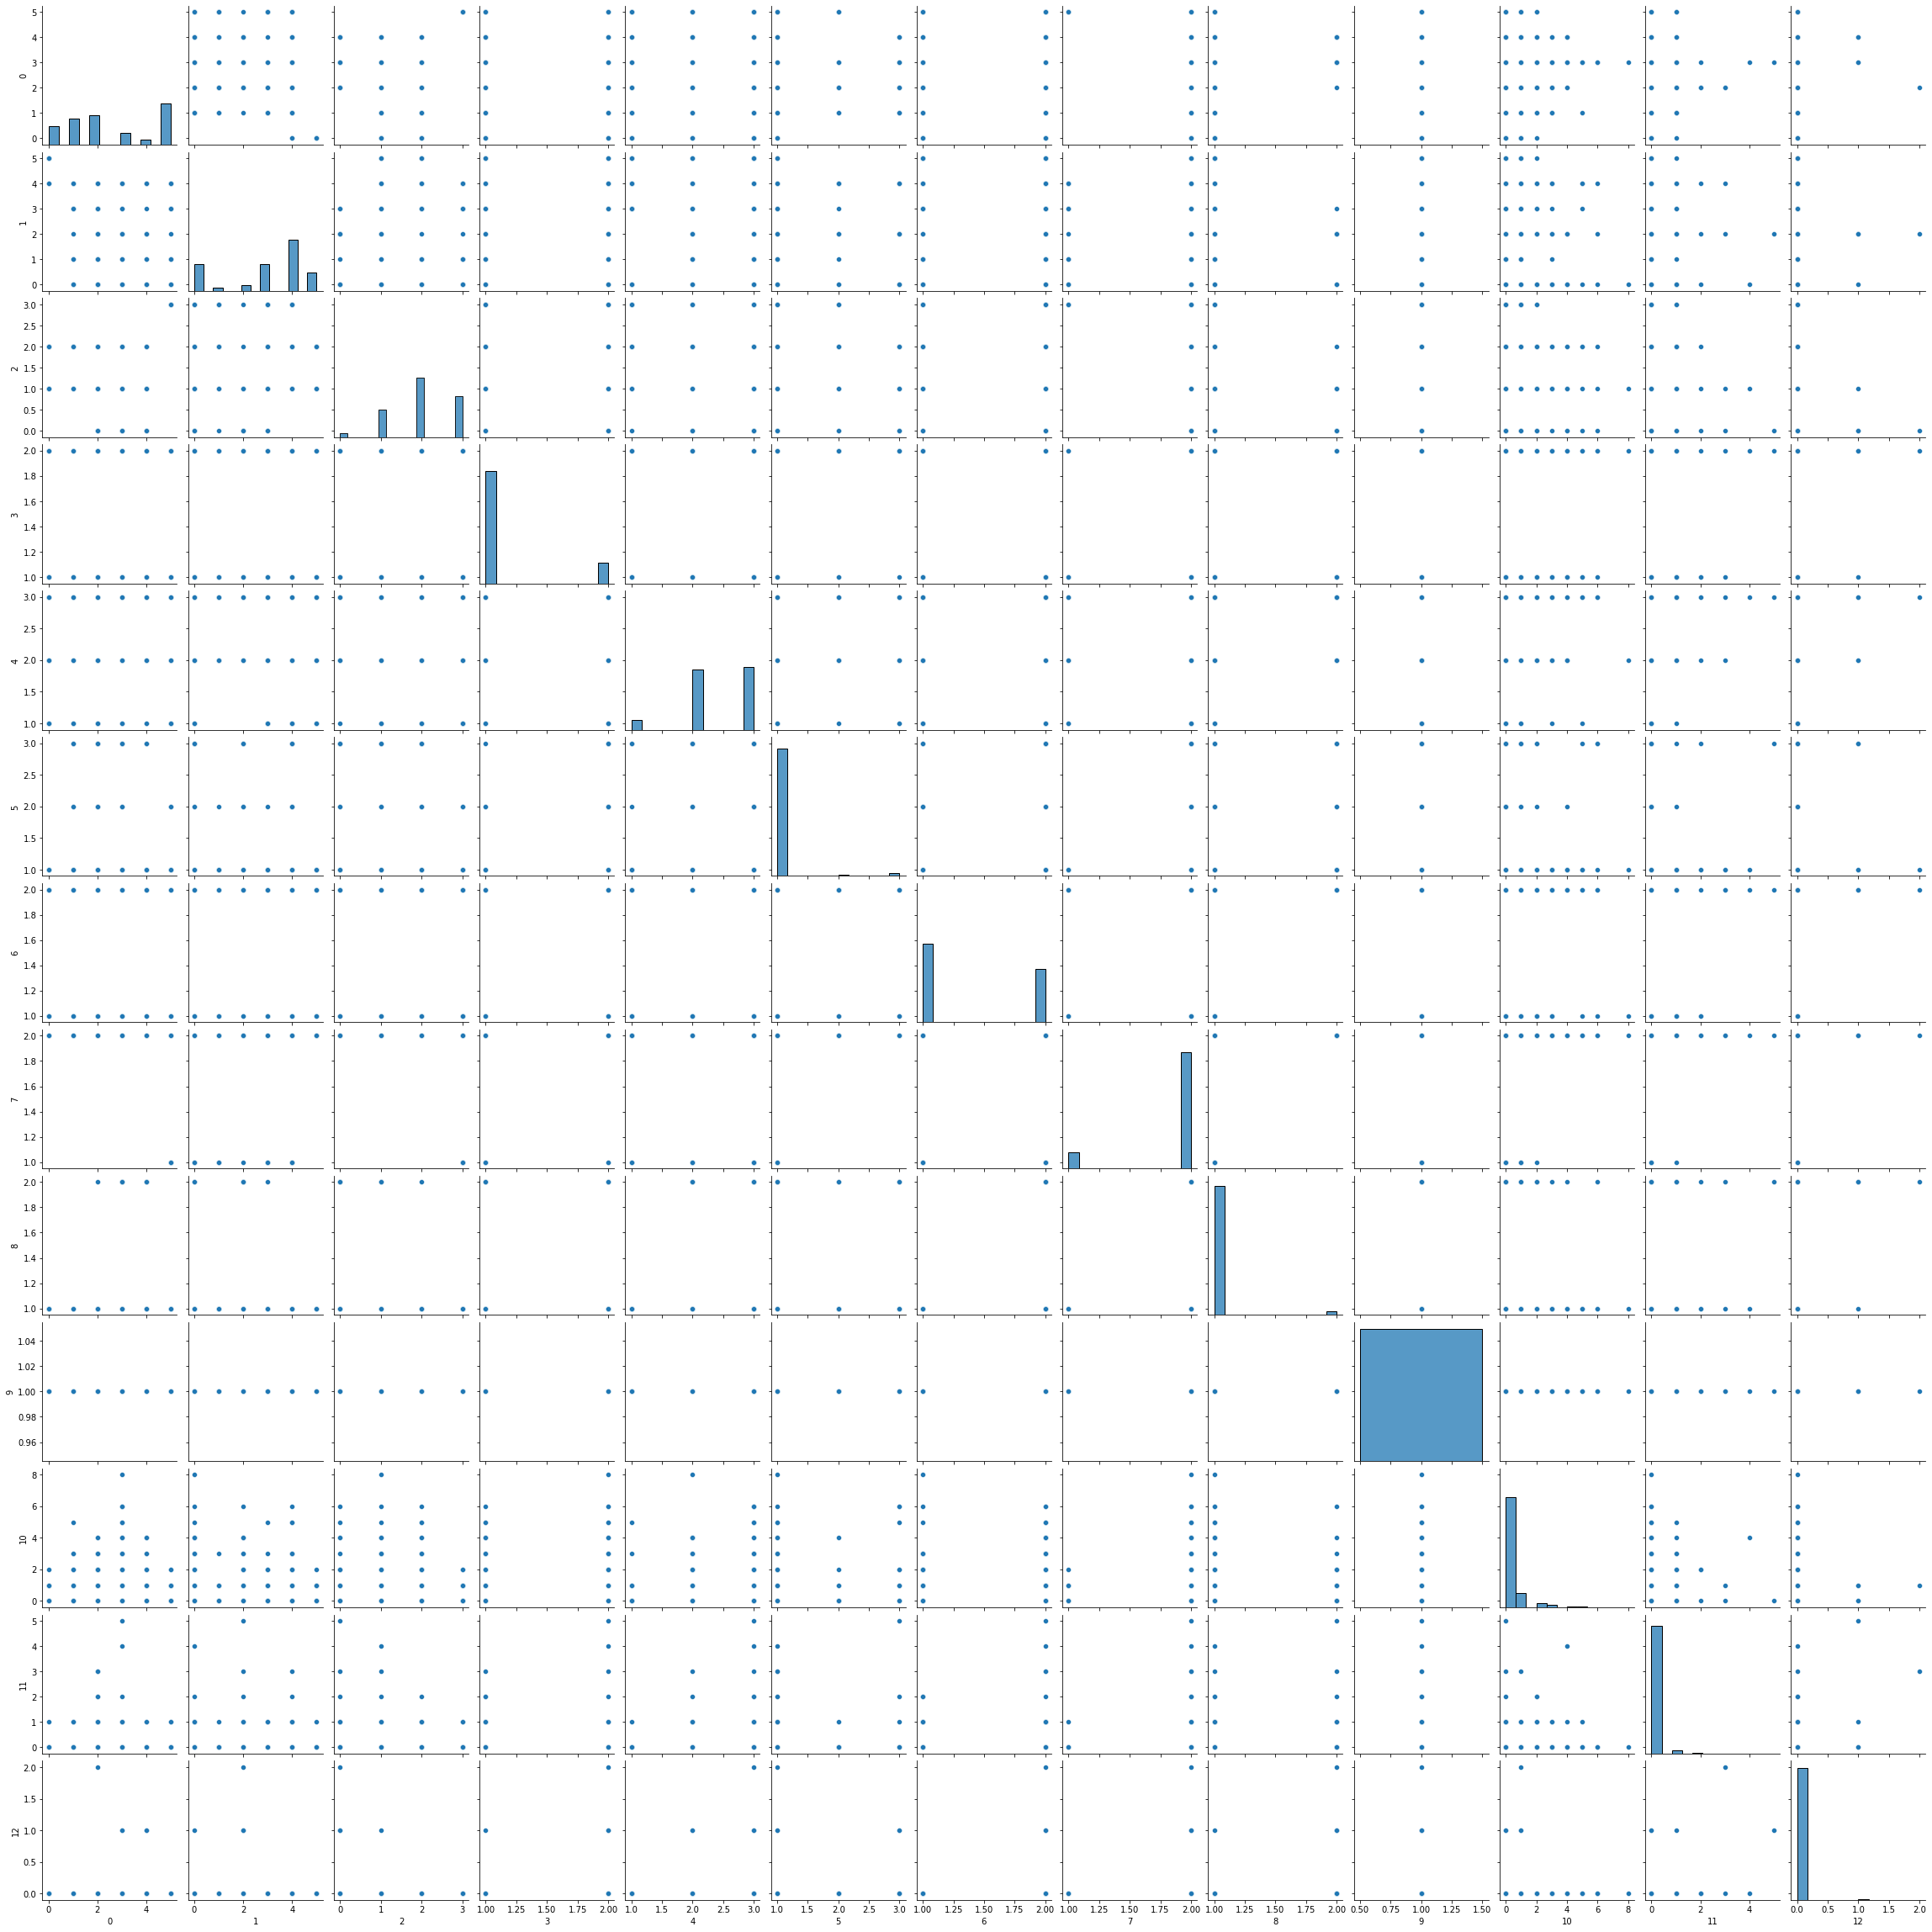

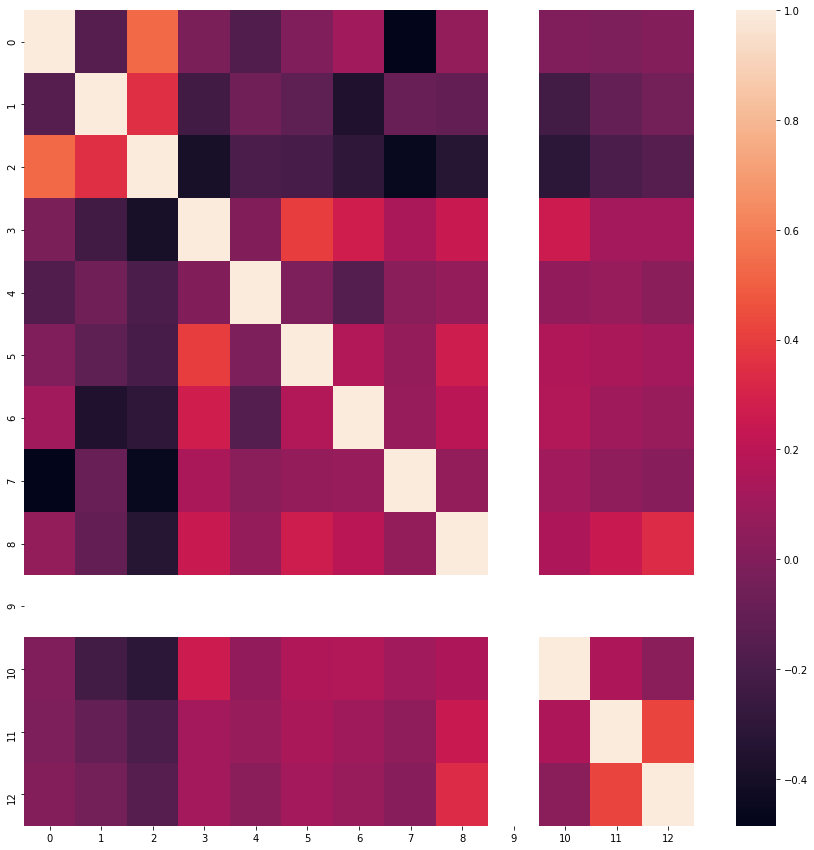

In [6]:
sns.pairplot(data=df)

#Heatmap
num_feat = df.select_dtypes(include=np.number).columns
plt.figure(figsize= (15, 15))
sns.heatmap(df.corr())

In [7]:
# TODO
# with sns.plotting_context("notebook",font_scale=2.5):
#     g = sns.pairplot(house[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
#                  hue='bedrooms', palette='tab20',size=6)
# g.set(xticklabels=[]);

In [8]:
set(df[9])

{1}

Drop 9th attribute

In [9]:
y1 = df[10]
y2 = df[11]
y3 = df[12]
X = df.drop([9, 10, 11, 12], axis = 1)
X.head(10)

,0,1,2,3,4,5,6,7,8
0,5,0,3,1,3,1,1,1,1
1,2,3,2,1,3,1,1,2,1
2,1,4,2,1,3,1,1,2,1
3,5,3,3,1,2,1,1,1,1
4,5,4,3,1,1,1,1,2,1
5,1,0,2,1,2,1,1,2,1
6,0,5,2,1,3,1,1,2,1
7,1,0,2,1,3,1,1,2,1
8,1,0,2,1,2,1,1,2,1
9,0,5,2,1,3,1,1,2,1


In [10]:
# TODO
# B. Normality and skewness
# Rescaling?
# TODO
# finaldata = pd.get_dummies(data) for 0,1,2

In [11]:
# TODO other y`s
train_X, test_X, train_y, test_y = train_test_split(X, y1, test_size = 0.2)

In [12]:
LR = LinearRegression(normalize=True)
LR.fit(train_X, train_y)

LinearRegression(normalize=True)

In [13]:
maxcoef = np.argsort(-np.abs(LR.coef_))
coef = LR.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(df.columns[maxcoef[i]], coef[i]))


2........................ -3.9508e-01
3........................  2.3876e-01
5........................  1.6884e-01
8........................ -1.2624e-01
0........................  9.7230e-02


In [14]:
pred = LR.predict(train_X)
print('Accuracy in percent = ',mean_squared_error(pred, train_y))

Accuracy in percent =  0.6385087031333175


In [15]:
pred = LR.predict(test_X)
print('Accuracy in percent = ',mean_squared_error(pred, test_y))

Accuracy in percent =  0.4311025315439436


In [16]:
from sklearn.model_selection import learning_curve

In [17]:
train_sizes = [1, 10, 100, 500, 700]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(),
X = X,
y = y1, train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [18]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1     -0.000000
10     0.091983
100    1.112652
500    0.700769
700    0.623287
dtype: float64

 --------------------

Mean validation scores

 1      0.787105
10     1.058952
100    1.171046
500    0.670815
700    0.650020
dtype: float64


(0.0, 1.5)

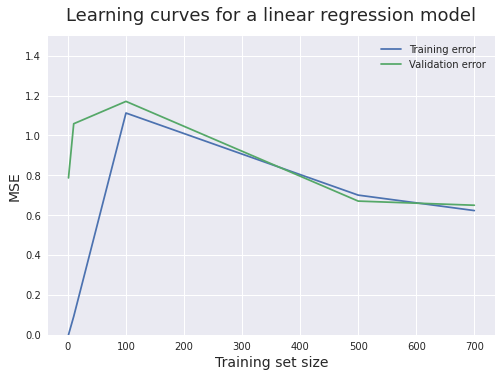

In [19]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1.5)


In [20]:
df = pd.read_csv(r'flare.data2', sep=' ', header=None)
pd.set_option('display.max_columns', 500)
newdf = pd.get_dummies(df)
newdf.head()

,3,4,5,6,7,8,9,10,11,12,0_B,0_C,0_D,0_E,0_F,0_H,1_A,1_H,1_K,1_R,1_S,1_X,2_C,2_I,2_O,2_X
0,1,3,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
1,1,3,1,1,2,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,3,1,1,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1,2,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,1,1,1,1,2,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [21]:
newdf.describe()

,3,4,5,6,7,8,9,10,11,12,0_B,0_C,0_D,0_E,0_F,0_H,1_A,1_H,1_K,1_R,1_S,1_X,2_C,2_I,2_O,2_X
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.0,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000
mean,1.153846,2.401501,1.059099,1.404315,1.875235,1.025328,1.0,0.300188,0.046904,0.005629,0.137899,0.197936,0.224203,0.089118,0.040338,0.310507,0.202627,0.025328,0.043152,0.204503,0.388368,0.136023,0.032833,0.209193,0.447467,0.310507
std,0.360971,0.620584,0.320324,0.490989,0.330608,0.157194,0.0,0.835784,0.302811,0.086487,0.344955,0.398631,0.417252,0.285048,0.196842,0.462918,0.402145,0.157194,0.203294,0.403527,0.487608,0.342973,0.178283,0.406924,0.497466,0.462918
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.0,8.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
y1 = newdf[10]
y2 = newdf[11]
y3 = newdf[12]
X = newdf.drop([9, 10, 11, 12], axis = 1)
X.head()

,3,4,5,6,7,8,0_B,0_C,0_D,0_E,0_F,0_H,1_A,1_H,1_K,1_R,1_S,1_X,2_C,2_I,2_O,2_X
0,1,3,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
1,1,3,1,1,2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,3,1,1,2,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1,2,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,1,1,1,1,2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


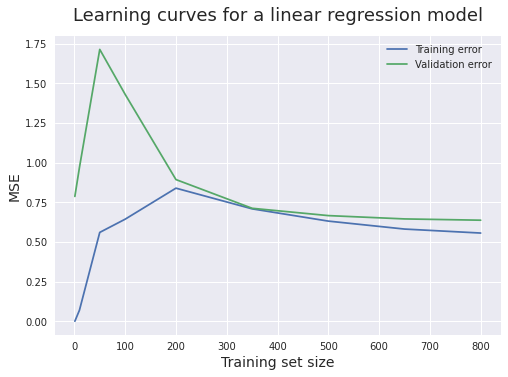

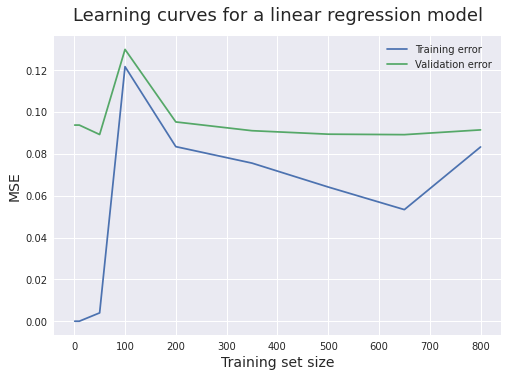

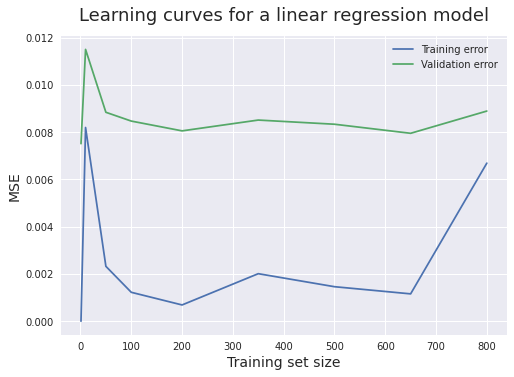

In [23]:
import matplotlib.pyplot as plt

for cur_y in [y1,y2,y3]:
    train_sizes = [1, 10, 50, 100, 200, 350 ,500, 650, 800]
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator = Ridge(alpha=.5),
    X = X,
    y = cur_y, train_sizes = train_sizes, cv = 5,
    scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)
    # print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
    # print('\n', '-' * 20) # separator
    # print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
    plt.legend()
#     plt.ylim(0,2)
#     plt.plot()
    plt.show()

INTEGER VALUES CAN BE ROUNDED

In [24]:
pred = LR.predict(train_X)
pred_round = np.abs(np.round(pred))
newdf1 = pd.DataFrame(
    {'Actual': train_y.values.flatten(), 
     'Predicted': pred.flatten(),
    'Rounded': pred_round.flatten()})
newdf1

,Actual,Predicted,Rounded
0,0,0.127929,0.0
1,0,0.654119,1.0
2,3,0.127929,0.0
3,2,1.028651,1.0
4,0,0.075104,0.0
...,...,...,...
847,0,0.235463,0.0
848,0,-0.001350,0.0
849,0,1.402368,1.0
850,0,0.033665,0.0


In [25]:
pred = LR.predict(train_X)
print('Accuracy in percent = ',mean_squared_error(pred, train_y))

Accuracy in percent =  0.6385087031333175


In [26]:
pred = LR.predict(train_X)
print('Accuracy in percent = ',mean_squared_error(pred_round, train_y))

Accuracy in percent =  0.6866197183098591


In [27]:
pred = LR.predict(test_X)
pred_round = np.round(pred)
newdf1 = pd.DataFrame(
    {'Actual': test_y.values.flatten(), 
     'Predicted': pred.flatten(),
    'Rounded': pred_round.flatten()})
newdf1

,Actual,Predicted,Rounded
0,0,-0.001350,-0.0
1,3,0.933397,1.0
2,0,-0.001350,-0.0
3,0,-0.042790,-0.0
4,0,0.104349,0.0
...,...,...,...
209,0,0.217604,0.0
210,1,1.489047,1.0
211,0,0.735323,1.0
212,0,0.702194,1.0


In [28]:
pred = LR.predict(test_X)
print('Accuracy in percent = ',mean_squared_error(pred, test_y))

Accuracy in percent =  0.4311025315439436


In [29]:
pred = LR.predict(test_X)
print('Accuracy in percent = ',mean_squared_error(pred_round, test_y))

Accuracy in percent =  0.4953271028037383


# data1

In [30]:
df = pd.read_csv(r'flare.data1', sep=' ', header=None)

In [31]:
df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,C,S,O,1,2,1,1,2,1,2,0,0,0
1,D,S,O,1,3,1,1,2,1,2,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,D,S,O,1,3,1,1,2,1,2,0,0,0
4,D,A,O,1,3,1,1,2,1,2,0,0,0
5,D,A,O,1,2,1,1,2,1,2,0,0,0
6,D,A,O,1,2,1,1,2,1,1,0,0,0
7,D,A,O,1,2,1,1,2,1,2,0,0,0
8,D,K,O,1,3,1,1,2,1,2,0,0,0
9,C,R,O,1,3,1,1,2,1,1,0,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       323 non-null    object
 1   1       323 non-null    object
 2   2       323 non-null    object
 3   3       323 non-null    int64 
 4   4       323 non-null    int64 
 5   5       323 non-null    int64 
 6   6       323 non-null    int64 
 7   7       323 non-null    int64 
 8   8       323 non-null    int64 
 9   9       323 non-null    int64 
 10  10      323 non-null    int64 
 11  11      323 non-null    int64 
 12  12      323 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 32.9+ KB


In [33]:
df[0] = LabelEncoder().fit_transform(df[0].tolist())
df[1] = LabelEncoder().fit_transform(df[1].tolist())
df[2] = LabelEncoder().fit_transform(df[2].tolist())

<AxesSubplot:>

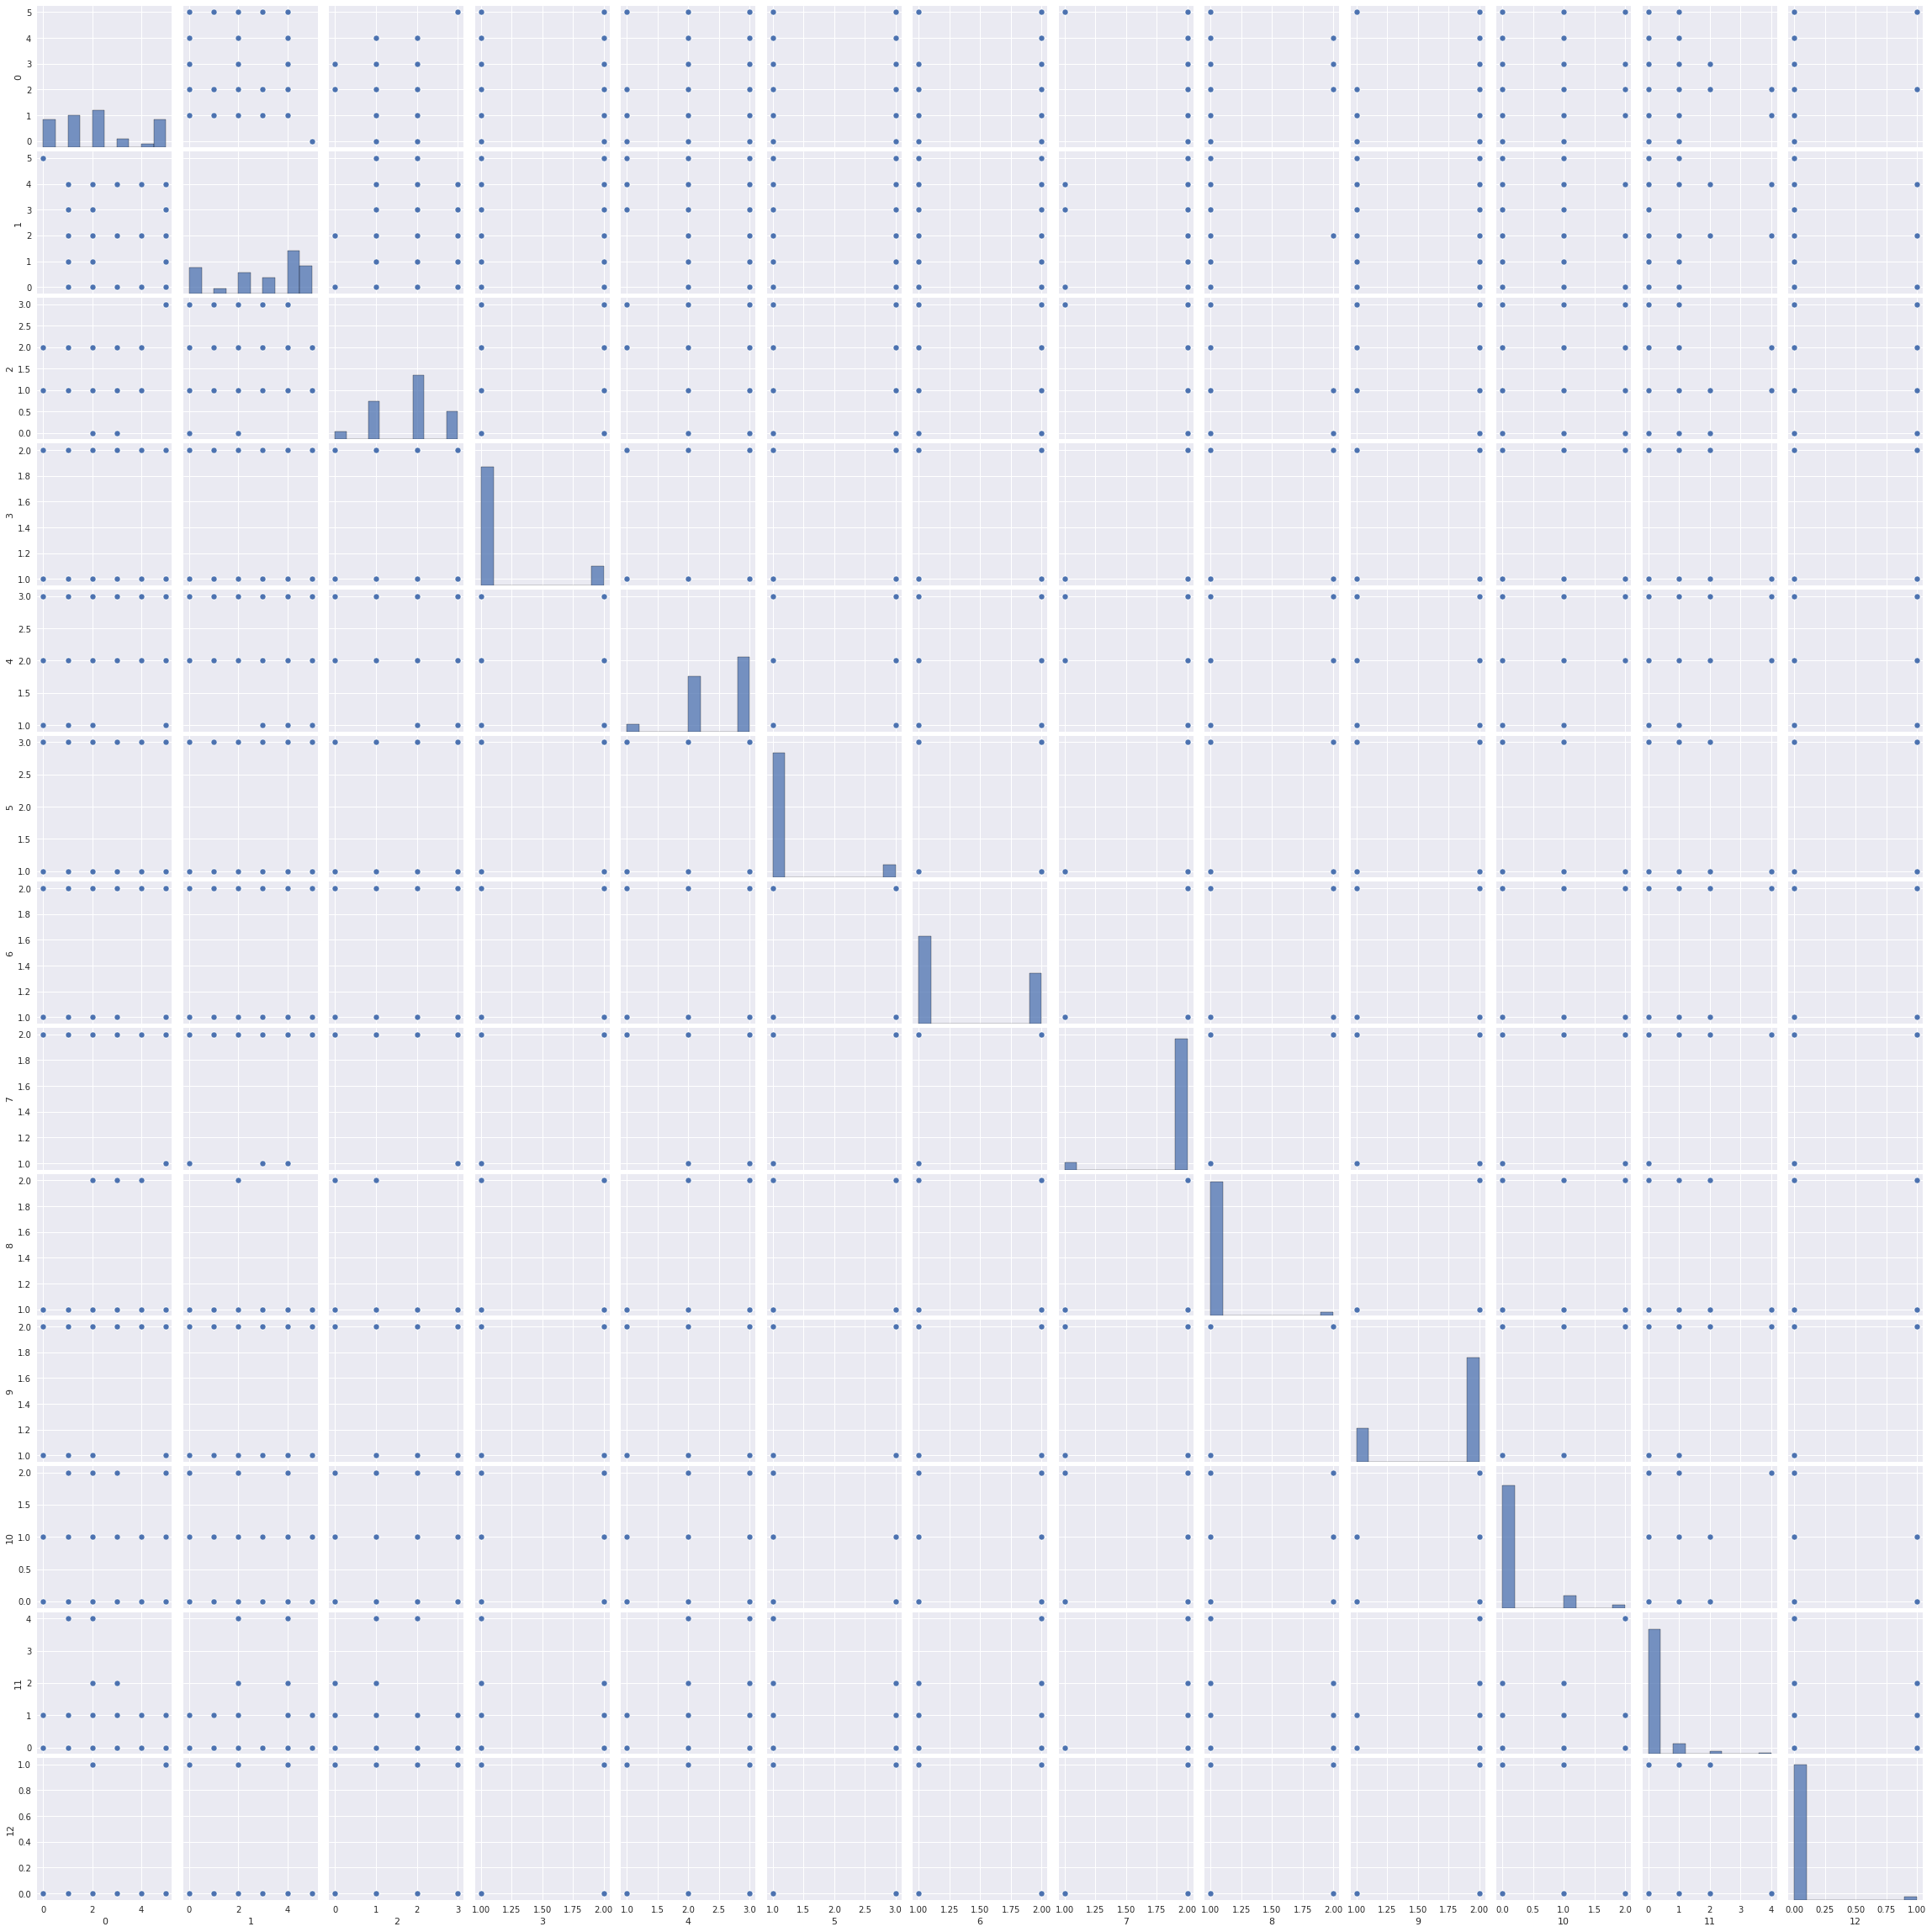

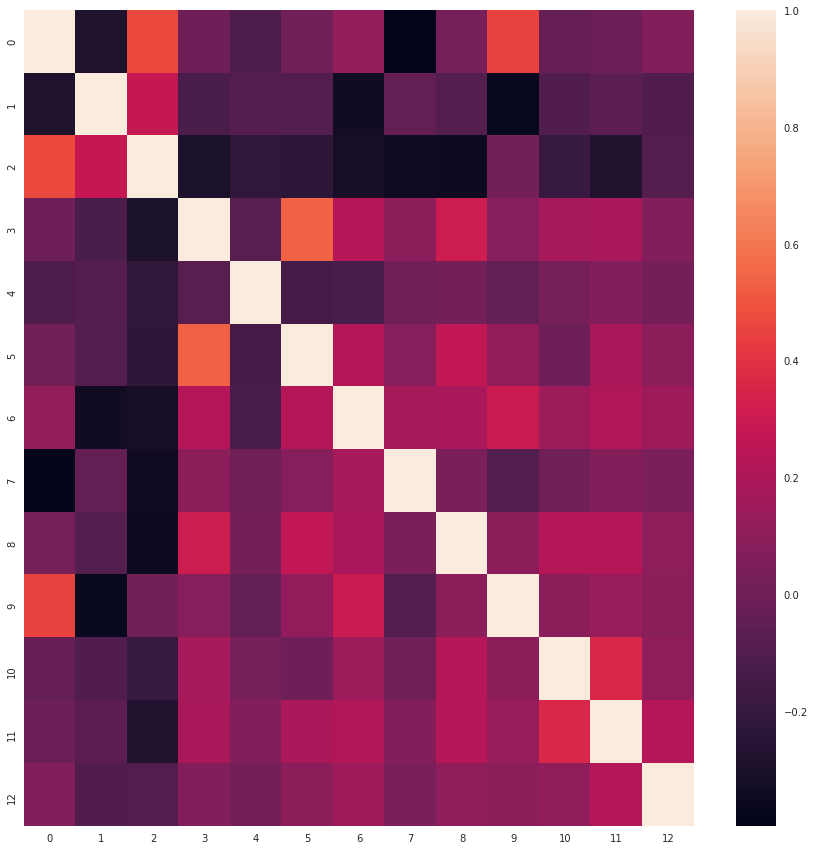

In [34]:
sns.pairplot(data=df)

#Heatmap
num_feat = df.select_dtypes(include=np.number).columns
plt.figure(figsize= (15, 15))
sns.heatmap(df.corr())

In [35]:
y1 = df[10]
y2 = df[11]
y3 = df[12]
X = df.drop([10, 11, 12], axis = 1)
X.head(10)

,0,1,2,3,4,5,6,7,8,9
0,1,4,2,1,2,1,1,2,1,2
1,2,4,2,1,3,1,1,2,1,2
2,1,4,2,1,3,1,1,2,1,1
3,2,4,2,1,3,1,1,2,1,2
4,2,0,2,1,3,1,1,2,1,2
5,2,0,2,1,2,1,1,2,1,2
6,2,0,2,1,2,1,1,2,1,1
7,2,0,2,1,2,1,1,2,1,2
8,2,2,2,1,3,1,1,2,1,2
9,1,3,2,1,3,1,1,2,1,1


In [36]:
# TODO other y`s
train_X, test_X, train_y, test_y = train_test_split(X, y1, test_size = 0.2)
LR = LinearRegression(normalize=False)
LR.fit(train_X, train_y)

LinearRegression()

In [37]:
maxcoef = np.argsort(-np.abs(LR.coef_))
coef = LR.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(df.columns[maxcoef[i]], coef[i]))

3........................  1.6788e-01
8........................  1.5141e-01
7........................ -1.4303e-01
5........................ -1.3587e-01
6........................  7.3506e-02


In [38]:
pred = LR.predict(test_X)
print('Accuracy in percent = ',mean_squared_error(pred, test_y))

Accuracy in percent =  0.21686197723155828


In [39]:
pred = LR.predict(train_X)
print('Accuracy in percent = ',mean_squared_error(pred, train_y))

Accuracy in percent =  0.12626656379648613


and dummies

In [40]:
df = pd.read_csv(r'flare.data1', sep=' ', header=None)
pd.set_option('display.max_columns', 500)
newdf = pd.get_dummies(df)
newdf.head()

,3,4,5,6,7,8,9,10,11,12,0_B,0_C,0_D,0_E,0_F,0_H,1_A,1_H,1_K,1_R,1_S,1_X,2_C,2_I,2_O,2_X
0,1,2,1,1,2,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,3,1,1,2,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,3,1,1,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1,3,1,1,2,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,1,3,1,1,2,1,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [41]:
newdf.describe()

,3,4,5,6,7,8,9,10,11,12,0_B,0_C,0_D,0_E,0_F,0_H,1_A,1_H,1_K,1_R,1_S,1_X,2_C,2_I,2_O,2_X
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,1.139319,2.486068,1.191950,1.368421,1.947368,1.027864,1.755418,0.133127,0.136223,0.021672,0.201238,0.235294,0.272446,0.065015,0.024768,0.201238,0.188854,0.034056,0.148607,0.117647,0.309598,0.201238,0.058824,0.275542,0.464396,0.201238
std,0.346816,0.601983,0.590029,0.483125,0.223643,0.164838,0.430506,0.399050,0.479409,0.145836,0.401548,0.424841,0.445909,0.246936,0.155658,0.401548,0.392000,0.181654,0.356252,0.322690,0.463045,0.401548,0.235659,0.447480,0.499505,0.401548
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
y1 = newdf[10]
y2 = newdf[11]
y3 = newdf[12]
X = newdf.drop([10, 11, 12], axis = 1)
X.head()

,3,4,5,6,7,8,9,0_B,0_C,0_D,0_E,0_F,0_H,1_A,1_H,1_K,1_R,1_S,1_X,2_C,2_I,2_O,2_X
0,1,2,1,1,2,1,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,3,1,1,2,1,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,3,1,1,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1,3,1,1,2,1,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,1,3,1,1,2,1,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [43]:
pred = LR.predict(train_X)
pred_round = np.abs(np.round(pred))
newdf1 = pd.DataFrame(
    {'Actual': train_y.values.flatten(), 
     'Predicted': pred.flatten(),
    'Rounded': pred_round.flatten()})
newdf1

,Actual,Predicted,Rounded
0,0,0.011721,0.0
1,0,0.055742,0.0
2,1,0.050321,0.0
3,0,0.088842,0.0
4,0,0.058111,0.0
...,...,...,...
253,0,0.203265,0.0
254,0,0.058111,0.0
255,0,0.357009,0.0
256,0,0.174552,0.0


In [44]:
pred = LR.predict(train_X)
print('Accuracy in percent = ',mean_squared_error(pred, train_y))

Accuracy in percent =  0.12626656379648613


In [45]:
pred = LR.predict(train_X)
print('Accuracy in percent = ',mean_squared_error(pred_round, train_y))

Accuracy in percent =  0.14728682170542637


In [46]:
pred = LR.predict(test_X)
pred_round = np.round(pred)
newdf1 = pd.DataFrame(
    {'Actual': test_y.values.flatten(), 
     'Predicted': pred.flatten(),
    'Rounded': pred_round.flatten()})
newdf1

,Actual,Predicted,Rounded
0,0,-0.009240,-0.0
1,0,0.014127,0.0
2,1,0.597708,1.0
3,0,0.012377,0.0
4,0,0.239896,0.0
...,...,...,...
60,0,0.088842,0.0
61,0,0.174593,0.0
62,0,0.149433,0.0
63,0,0.115623,0.0


In [47]:
pred = LR.predict(test_X)
print('Accuracy in percent = ',mean_squared_error(pred, test_y))

Accuracy in percent =  0.21686197723155828


In [48]:
pred = LR.predict(test_X)
print('Accuracy in percent = ',mean_squared_error(pred_round, test_y))

Accuracy in percent =  0.2153846153846154


65% is the best result we had

вообще как-то раз случайно получилось 70%, но воспроизвести повторно не удалось

вообще теперь есть нетронутый файл с результатом аккураси 1.0, просто как реликвия

# data1 + data2

In [49]:
df = pd.read_csv(r'flare.data1', sep=' ', header=None)
df = df.append(pd.read_csv(r'flare.data2', sep=' ', header=None))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1389 entries, 0 to 1065
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1389 non-null   object
 1   1       1389 non-null   object
 2   2       1389 non-null   object
 3   3       1389 non-null   int64 
 4   4       1389 non-null   int64 
 5   5       1389 non-null   int64 
 6   6       1389 non-null   int64 
 7   7       1389 non-null   int64 
 8   8       1389 non-null   int64 
 9   9       1389 non-null   int64 
 10  10      1389 non-null   int64 
 11  11      1389 non-null   int64 
 12  12      1389 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 151.9+ KB


In [68]:
df[0] = LabelEncoder().fit_transform(df[0].tolist())
df[1] = LabelEncoder().fit_transform(df[1].tolist())
df[2] = LabelEncoder().fit_transform(df[2].tolist())

y1 = df[10]
y2 = df[11]
y3 = df[12]
X = df.drop([10, 11, 12], axis = 1)
X.head(10)

,0,1,2,3,4,5,6,7,8,9
0,1,4,2,1,2,1,1,2,1,2
1,2,4,2,1,3,1,1,2,1,2
2,1,4,2,1,3,1,1,2,1,1
3,2,4,2,1,3,1,1,2,1,2
4,2,0,2,1,3,1,1,2,1,2
5,2,0,2,1,2,1,1,2,1,2
6,2,0,2,1,2,1,1,2,1,1
7,2,0,2,1,2,1,1,2,1,2
8,2,2,2,1,3,1,1,2,1,2
9,1,3,2,1,3,1,1,2,1,1


In [73]:
df.columns
df[10]

0       0
1       0
2       0
3       0
4       0
       ..
1061    0
1062    0
1063    0
1064    0
1065    0
Name: 10, Length: 1389, dtype: int64

In [96]:
train, test = train_test_split(df, 
                               test_size = 0.2, 
                               stratify=df[2])
train_X = train.drop([10, 11, 12], axis = 1)
train_y = train[10]
test_X = test.drop([10, 11, 12], axis = 1)
test_y = test[10]

LR = LinearRegression(normalize=False)
LR.fit(train_X, train_y)

LinearRegression()

In [97]:
maxcoef = np.argsort(-np.abs(LR.coef_))
coef = LR.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(df.columns[maxcoef[i]], coef[i]))

2........................ -2.4978e-01
9........................ -2.0688e-01
3........................  1.6755e-01
8........................  7.6514e-02
0........................  5.4077e-02


In [98]:
pred = LR.predict(train_X)
print('Accuracy in percent = ',mean_squared_error(pred, train_y))

Accuracy in percent =  0.4593584402332675


In [99]:
newdf.describe()

,3,4,5,6,7,8,9,10,11,12,0_B,0_C,0_D,0_E,0_F,0_H,1_A,1_H,1_K,1_R,1_S,1_X,2_C,2_I,2_O,2_X
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,1.139319,2.486068,1.191950,1.368421,1.947368,1.027864,1.755418,0.133127,0.136223,0.021672,0.201238,0.235294,0.272446,0.065015,0.024768,0.201238,0.188854,0.034056,0.148607,0.117647,0.309598,0.201238,0.058824,0.275542,0.464396,0.201238
std,0.346816,0.601983,0.590029,0.483125,0.223643,0.164838,0.430506,0.399050,0.479409,0.145836,0.401548,0.424841,0.445909,0.246936,0.155658,0.401548,0.392000,0.181654,0.356252,0.322690,0.463045,0.401548,0.235659,0.447480,0.499505,0.401548
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
y1 = newdf[10]
y2 = newdf[11]
y3 = newdf[12]
X = newdf.drop([10, 11, 12], axis = 1)
X.head()

,3,4,5,6,7,8,9,0_B,0_C,0_D,0_E,0_F,0_H,1_A,1_H,1_K,1_R,1_S,1_X,2_C,2_I,2_O,2_X
0,1,2,1,1,2,1,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,3,1,1,2,1,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,3,1,1,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1,3,1,1,2,1,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,1,3,1,1,2,1,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [101]:
pred = LR.predict(train_X)
pred_round = np.abs(np.round(pred))
newdf1 = pd.DataFrame(
    {'Actual': train_y.values.flatten(), 
     'Predicted': pred.flatten(),
    'Rounded': pred_round.flatten()})
newdf1

,Actual,Predicted,Rounded
0,0,0.231197,0.0
1,0,0.042989,0.0
2,0,0.042989,0.0
3,0,0.303983,0.0
4,0,0.092514,0.0
...,...,...,...
1106,0,0.187545,0.0
1107,0,0.182939,0.0
1108,0,0.237016,0.0
1109,0,0.082236,0.0


In [102]:
pred = LR.predict(train_X)
print('Accuracy in percent = ',mean_squared_error(pred, train_y))

Accuracy in percent =  0.4593584402332675


In [103]:
pred = LR.predict(train_X)
print('Accuracy in percent = ',mean_squared_error(pred_round, train_y))

Accuracy in percent =  0.49504950495049505


In [104]:
pred = LR.predict(test_X)
pred_round = np.round(pred)
newdf1 = pd.DataFrame(
    {'Actual': test_y.values.flatten(), 
     'Predicted': pred.flatten(),
    'Rounded': pred_round.flatten()})
newdf1

,Actual,Predicted,Rounded
0,0,0.182939,0.0
1,1,0.719351,1.0
2,1,0.778466,1.0
3,0,0.080315,0.0
4,0,0.111830,0.0
...,...,...,...
273,0,0.165233,0.0
274,0,0.104446,0.0
275,0,0.197770,0.0
276,0,0.054203,0.0


In [105]:
pred = LR.predict(test_X)
print('Accuracy in percent = ',mean_squared_error(pred, test_y))

Accuracy in percent =  0.6871102173741912


In [106]:
pred = LR.predict(test_X)
print('Accuracy in percent = ',mean_squared_error(pred_round, test_y))

Accuracy in percent =  0.7050359712230215


In [112]:
pred = np.zeros(len(test_X),)
newdf1 = pd.DataFrame(
    {'Actual': test_y.values.flatten(), 
     'Zero': pred.flatten()
    })
newdf1

,Actual,Zero
0,0,0.0
1,1,0.0
2,1,0.0
3,0,0.0
4,0,0.0
...,...,...
273,0,0.0
274,0,0.0
275,0,0.0
276,0,0.0


In [113]:
pred = LR.predict(test_X)
print('Accuracy in percent = ',mean_squared_error(pred, test_y))

Accuracy in percent =  0.6871102173741912


In [114]:
pred = LR.predict(test_X)
print('Accuracy in percent = ',mean_squared_error(pred_round, test_y))

Accuracy in percent =  0.7050359712230215


Accuracy 70 with all zeros lol

In [ ]:
# may be we need to add weight to some important values TODO I just don't understadn HOW and   W H Y !!! 